# jammer
## 21 Extract, transform, and load the full-sampling 2M0136 data
### I- Data for Starfish

Michael Gully-Santiago  
May 26, 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns

In [2]:
from astropy.io import fits
import h5py

In [3]:
import astropy.units as u

In [4]:
from os import listdir

10704_10139.fits is 2M0136

In [5]:
file = '../../../other_GitHub/splat/reference/Spectra/10704_10139.fits'

In [6]:
fits_dat = fits.open(file)
fd_0 = fits_dat[0]
fd_0.data.shape

(3, 563)

It seems like the default SpeX Prism Library spectrum is normalized to its peak.

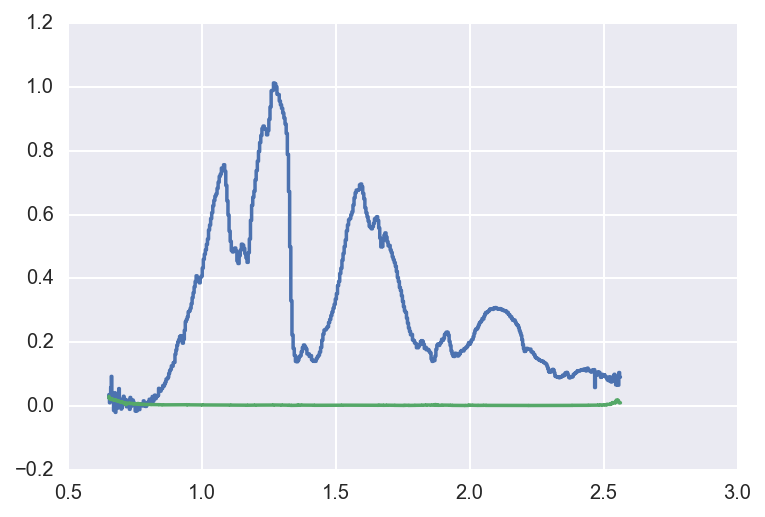

In [7]:
plt.step(fd_0.data[0, :], fd_0.data[1, :])
plt.step(fd_0.data[0, :], fd_0.data[2, :])

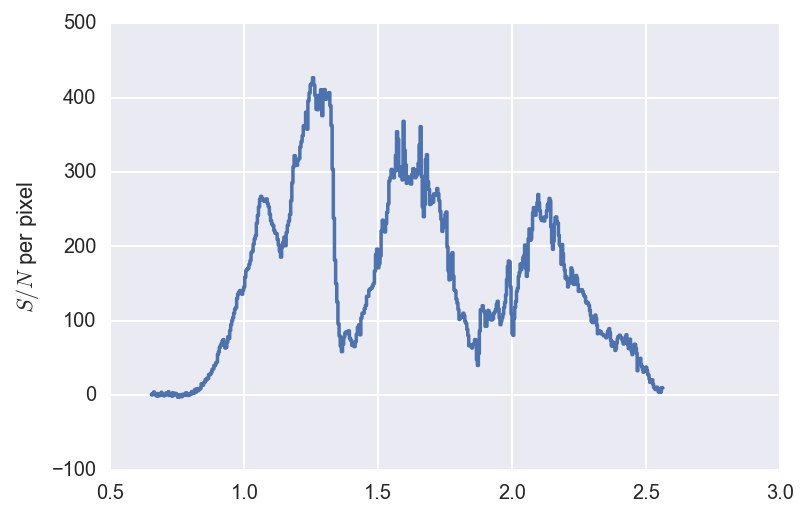

In [11]:
plt.step(fd_0.data[0, :], fd_0.data[1, :]/fd_0.data[2, :])
plt.ylabel('$S/N$ per pixel')

We need to convert the units to what Starfish expects:
- **wavelengths:** Angstroms
- **fluxes:** erg/s/cm$^2$/A

In [14]:
wlgrid = fd_0.data[0, :]
Flux = fd_0.data[1, :]
Flux_err = np.abs(fd_0.data[2, :])

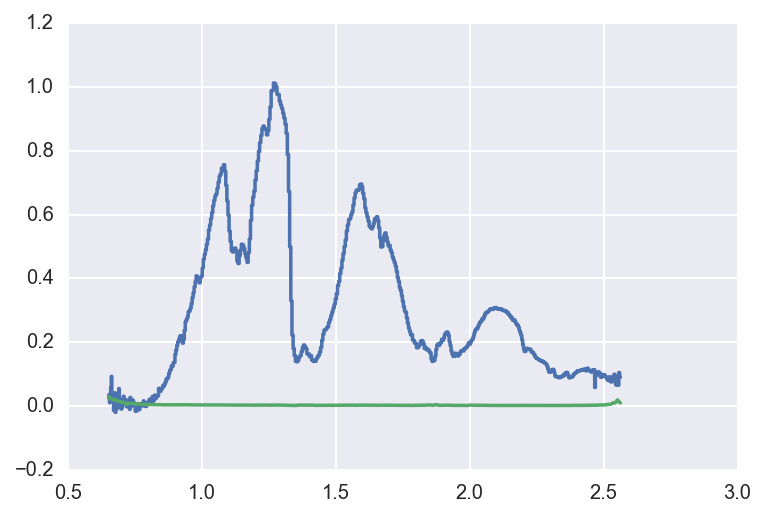

In [15]:
plt.step(wlgrid, Flux)
plt.plot(wlgrid, Flux_err)

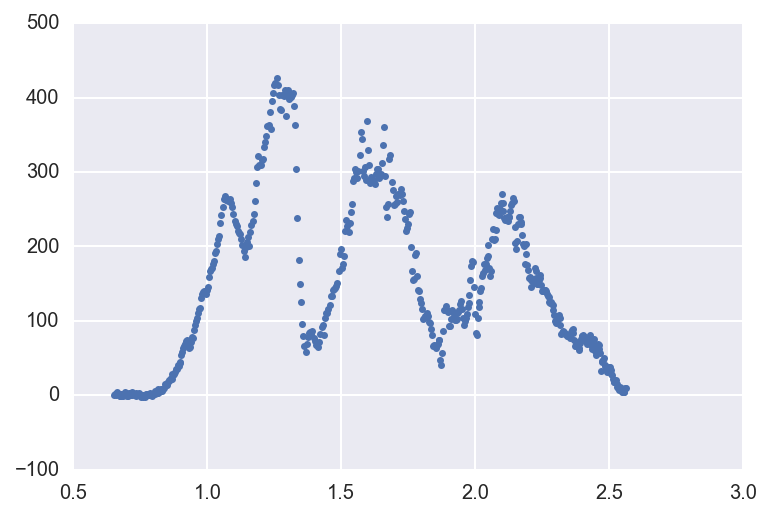

In [16]:
plt.plot(wlgrid, Flux/Flux_err, '.')

In [20]:
bi = ((Flux != Flux) | (np.abs(Flux) == np.inf) | 
      (Flux_err <= 0 ) | (np.abs(Flux_err) == np.inf) | (Flux_err != Flux_err))

In [21]:
bi.sum()

0

In [22]:
out_name = '../data/reduced/2M0136_full.hdf5'
fls_out = Flux
sig_out = Flux_err
#print(out_name, np.min(sig_out), np.sum(sig_out==0), np.percentile(fls_out/sig_out, 80))
wls_out = wlgrid*10000.0
msk_out = np.ones(len(wls_out), dtype=int)
f_new = h5py.File(out_name, 'w')
f_new.create_dataset('fls', data=fls_out)
f_new.create_dataset('wls', data=wls_out)
f_new.create_dataset('sigmas', data=sig_out)
f_new.create_dataset('masks', data=msk_out)
print("{:.0f}  -  {:.0f}   {}".format(wls_out[0], wls_out[-1], out_name))
f_new.close()

6531  -  25628   ../data/reduced/2M0136_full.hdf5


### The end!